# Serkan İşleyen 090230765

In [28]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import ttest_ind


<h1 align="center">🎓 Student Performance Analysis Project</h1>

<div style="background-color:#f0f8ff; border-left:6px solid #007acc; padding:10px 15px; margin-top:20px;">
  <h2 style="color:#007acc;">⏳ 1. Exploratory Data Analysis</h2>
</div>


### Dataset
We will use the Student Performance dataset from the UCI Machine Learning

### Uploading Dataset

Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T.

In [29]:
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 

# metadata 
#print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 

          name     role         type      demographic  \
0       school  Feature  Categorical             None   
1          sex  Feature       Binary              Sex   
2          age  Feature      Integer              Age   
3      address  Feature  Categorical             None   
4      famsize  Feature  Categorical            Other   
5      Pstatus  Feature  Categorical            Other   
6         Medu  Feature      Integer  Education Level   
7         Fedu  Feature      Integer  Education Level   
8         Mjob  Feature  Categorical       Occupation   
9         Fjob  Feature  Categorical       Occupation   
10      reason  Feature  Categorical             None   
11    guardian  Feature  Categorical             None   
12  traveltime  Feature      Integer             None   
13   studytime  Feature      Integer             None   
14    failures  Feature      Integer             None   
15   schoolsup  Feature       Binary             None   
16      famsup  Feature       B

### <h2> Missing Values</h2>
No missing values

### <h2> Dataset Description</h2>

The dataset contain649 rows ands 33 columns (including the target variable), with a mix of categorical, ordinal, and numerical data. The target variable is the final grade (G3), and the goal is to predict it using the available features. Here is a summary of the key features:

1. **school**: Student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex**: Student's sex ('F' - female, 'M' - male)
3. **age**: Student's age (numeric: from 15 to 22)
4. **address**: Student's home address type ('U' - urban, 'R' - rural)
5. **famsize**: Family size ('LE3' - less than or equal to 3, 'GT3' - greater than 3)
6. **Pstatus**: Parent's cohabitation status ('T' - living together, 'A' - apart)
7. **Medu**: Mother's education (0 - none, 1 - primary, 2 - secondary, 3 - higher education)
8. **Fedu**: Father's education (0 - none, 1 - primary, 2 - secondary, 3 - higher education)
9. **Mjob**: Mother's job ('teacher', 'health', 'services', 'at_home', 'other')
10. **Fjob**: Father's job ('teacher', 'health', 'services', 'at_home', 'other')
11. **reason**: Reason for choosing the school ('home', 'reputation', 'course', 'other')
12. **guardian**: Student's guardian ('mother', 'father', 'other')
13. **traveltime**: Home-to-school travel time (1 - <15 min, 2 - 15-30 min, 3 - 30-60 min, 4 - >60 min)
14. **studytime**: Weekly study time (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 - >10 hours)
15. **failures**: Number of past class failures (numeric: 1 to 4)
16. **schoolsup**: Extra educational support (yes/no)
17. **famsup**: Family educational support (yes/no)
18. **paid**: Extra paid classes (yes/no)
19. **activities**: Extra-curricular activities (yes/no)
20. **nursery**: Attended nursery school (yes/no)
21. **higher**: Wants to pursue higher education (yes/no)
22. **internet**: Internet access at home (yes/no)
23. **romantic**: In a romantic relationship (yes/no)
24. **famrel**: Family relationships quality (1 - very bad to 5 - excellent)
25. **freetime**: Free time after school (1 - very low to 5 - very high)
26. **goout**: Going out with friends (1 - very low to 5 - very high)
27. **Dalc**: Workday alcohol consumption (1 - very low to 5 - very high)
28. **Walc**: Weekend alcohol consumption (1 - very low to 5 - very high)
29. **health**: Current health status (1 - very bad to 5 - very good)
30. **absences**: Number of school absences (numeric: 0 to 93)
31. **G1**: First period grade (numeric: 0 to 20)
32. **G2**: Second period grade (numeric: 0 to 20)
33. **G3**: Final grade (numeric: 0 to 20, target variable)


In [30]:
X = student_performance.data.features
y = student_performance.data.targets
df = pd.concat([X, y], axis=1)


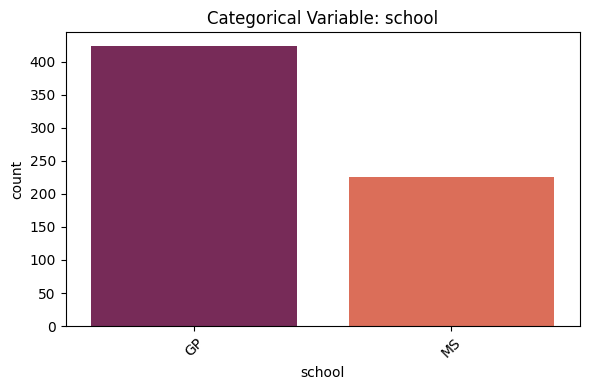

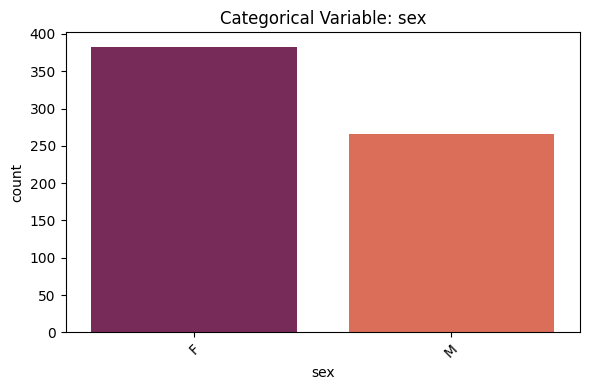

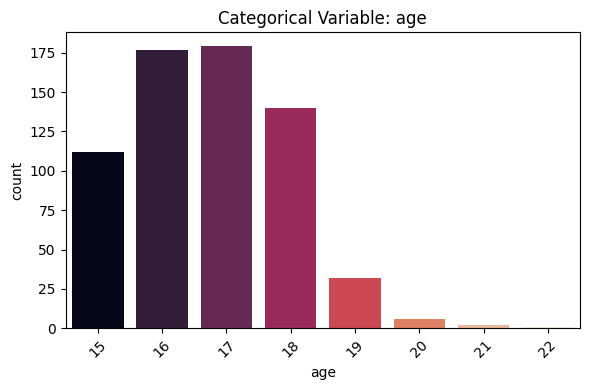

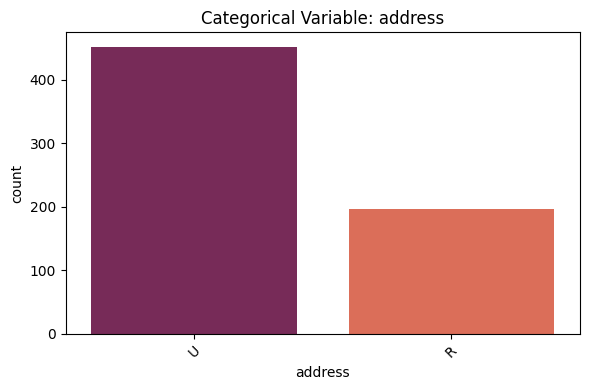

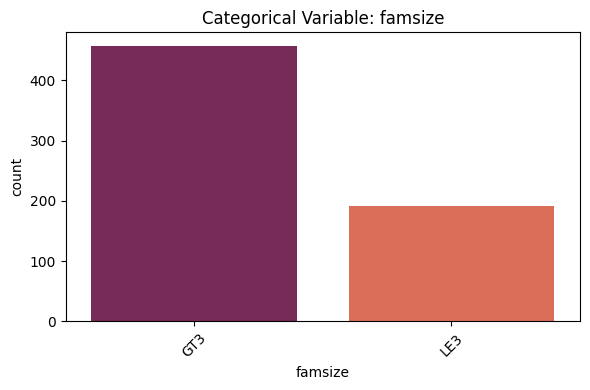

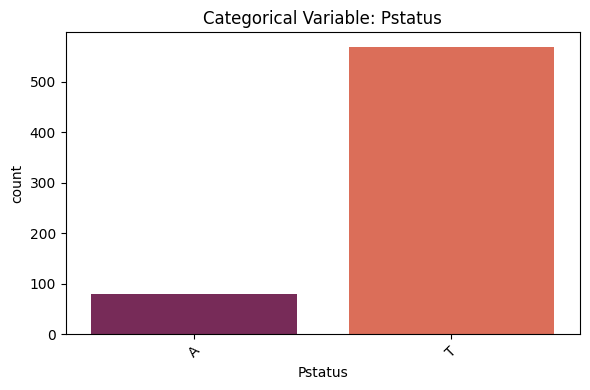

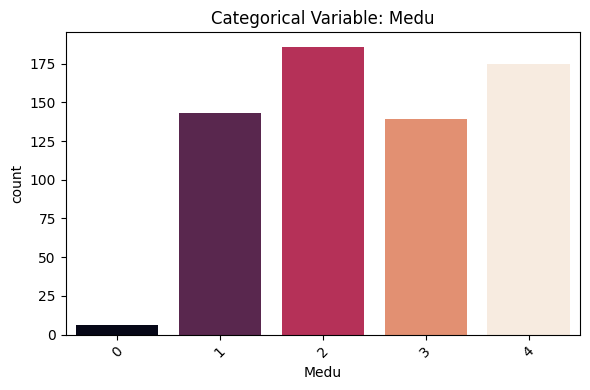

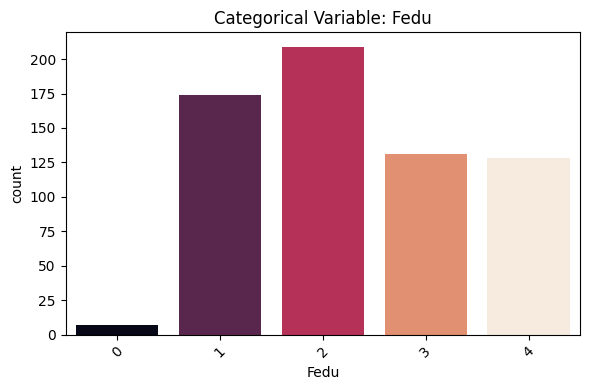

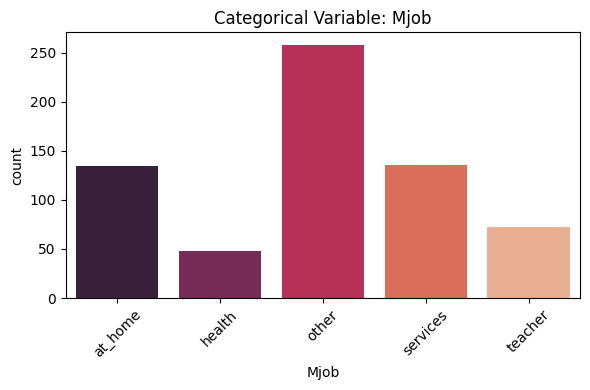

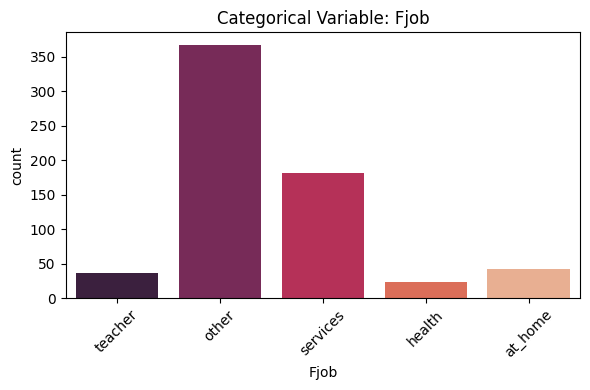

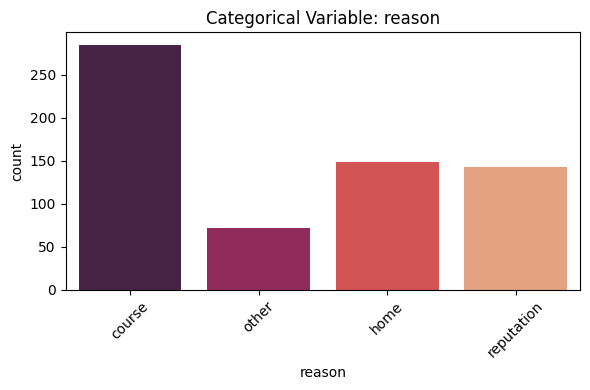

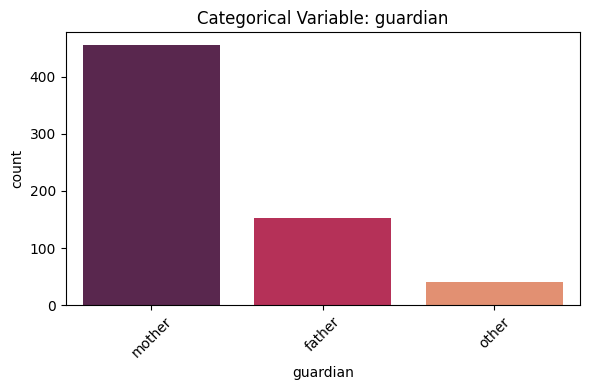

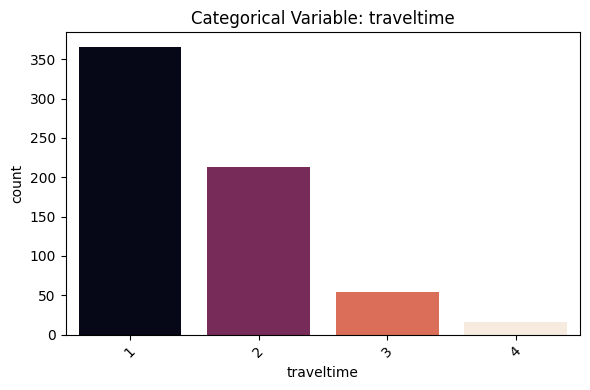

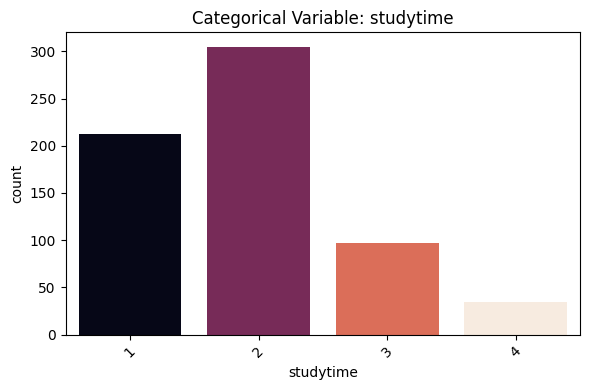

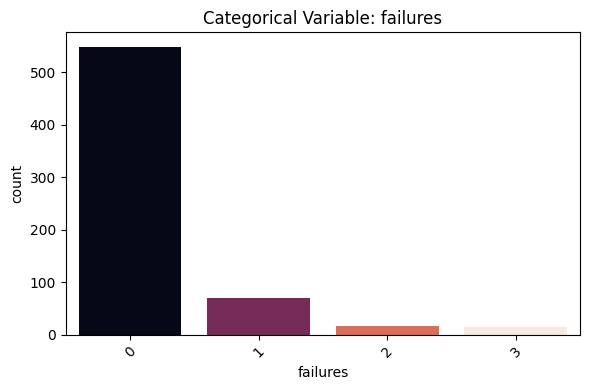

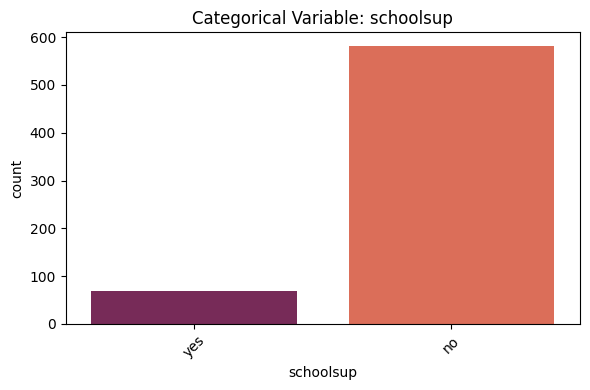

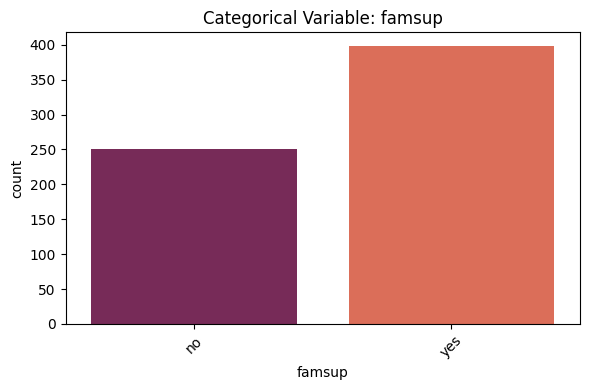

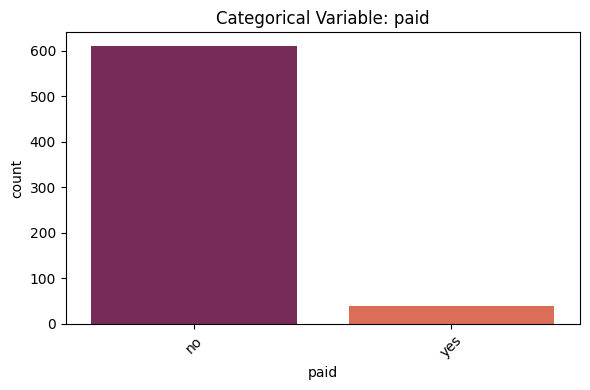

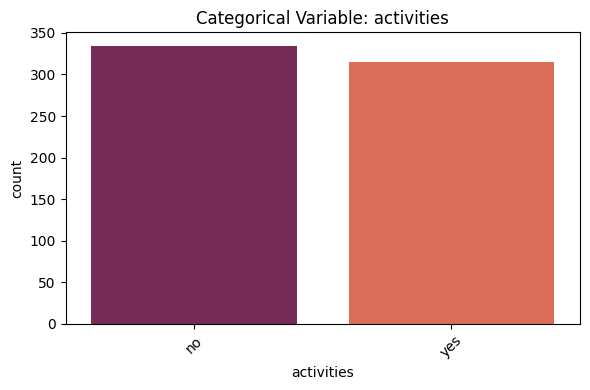

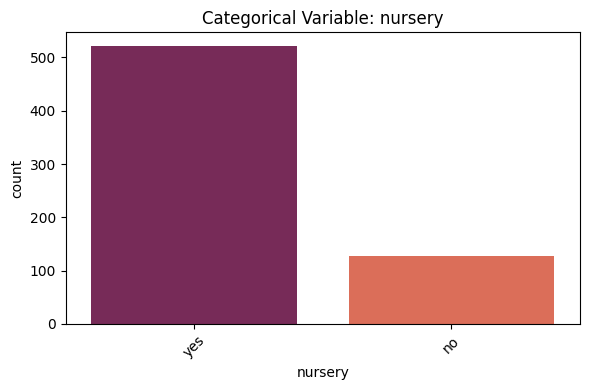

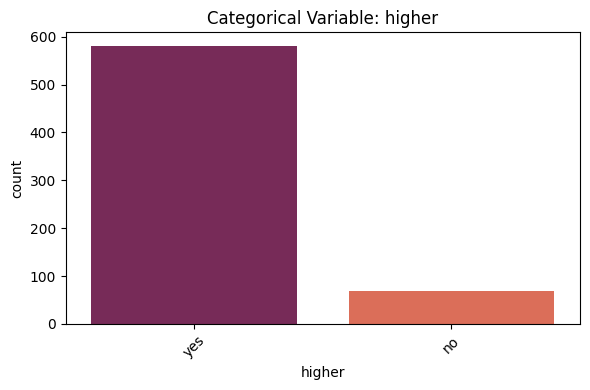

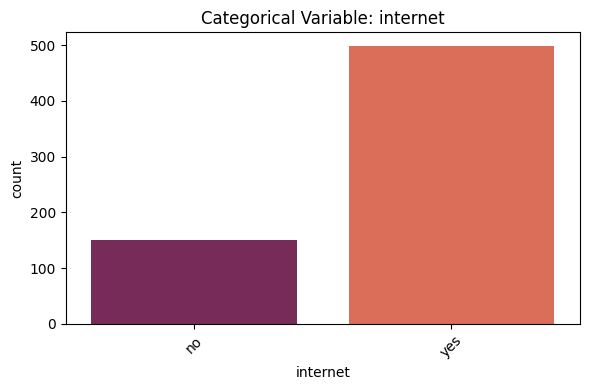

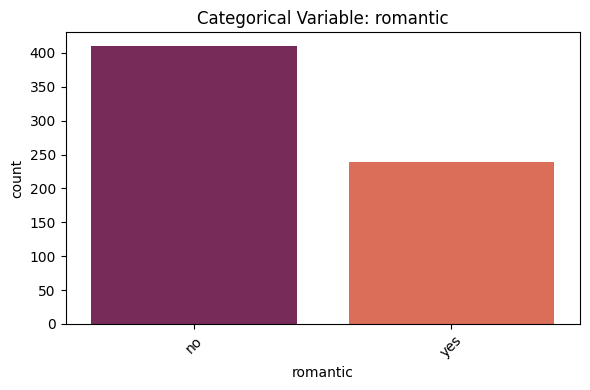

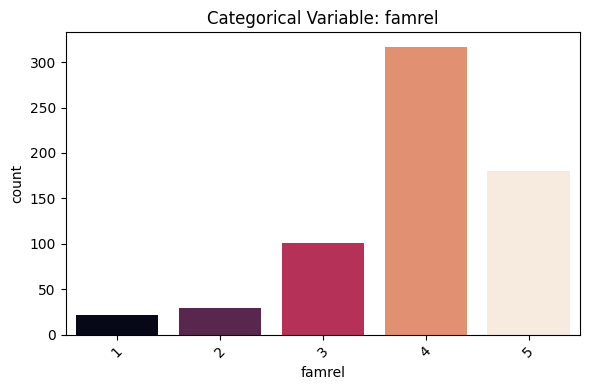

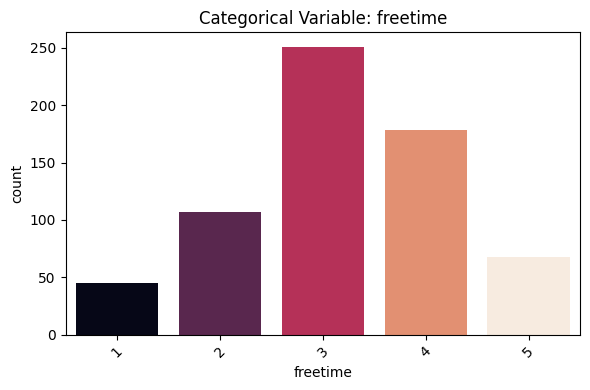

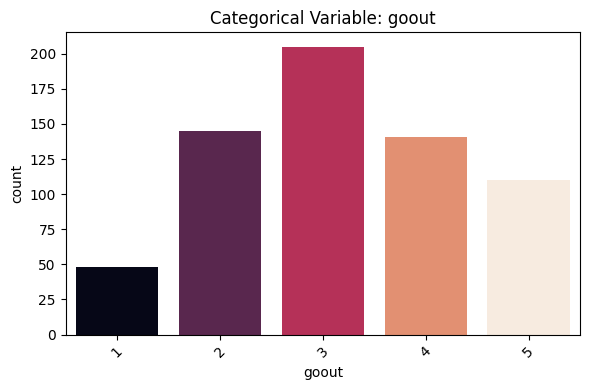

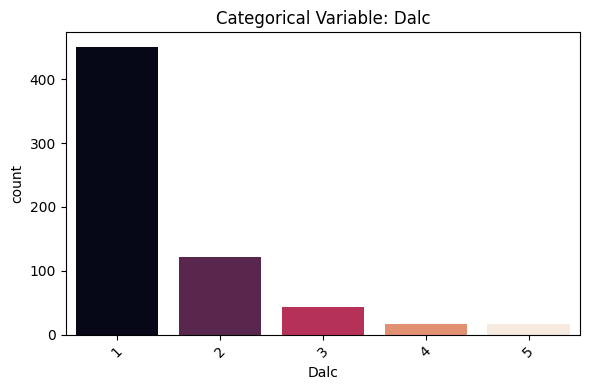

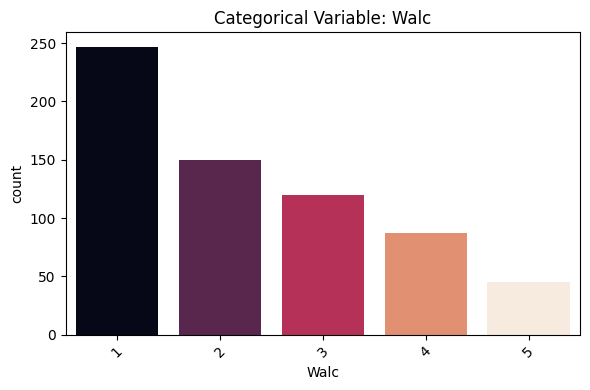

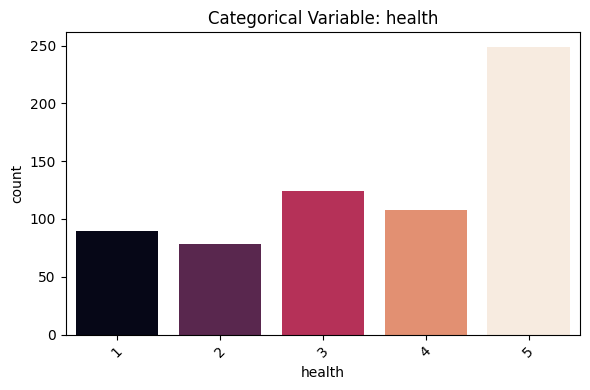

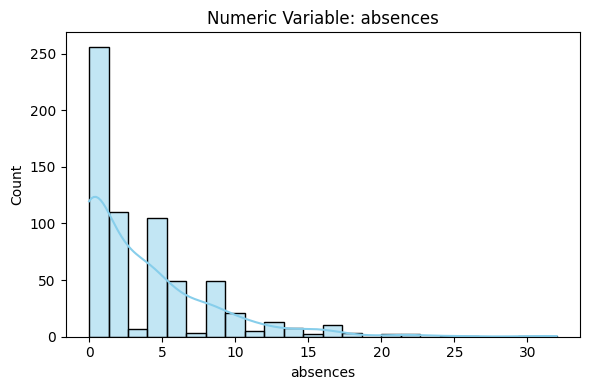

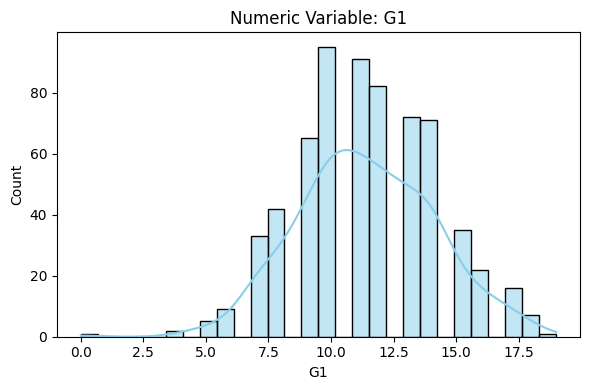

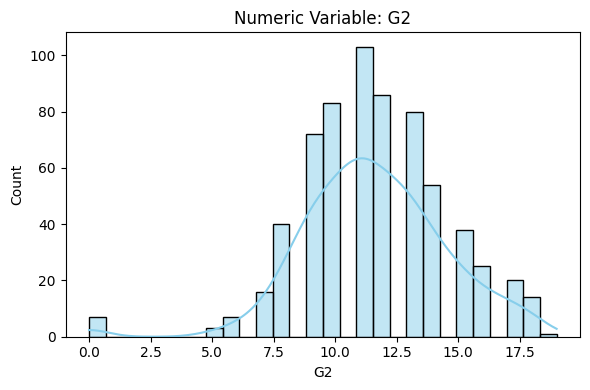

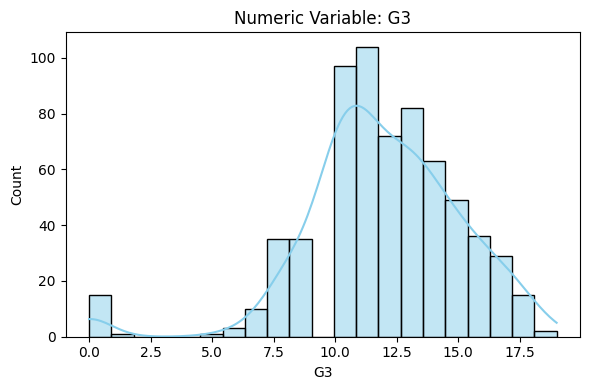

In [31]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    
    if df[col].dtype == 'object' or df[col].nunique() < 10:
        # Kategorik değişkenler için bar plot (uyarı olmadan)
        sns.countplot(data=df, x=col, hue=col, palette='rocket', legend=False)
        plt.title(f"Categorical Variable: {col}")
        plt.xticks(rotation=45)
    else:
        # Sayısal değişkenler için histogram
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f"Numeric Variable: {col}")
    
    plt.tight_layout()
    plt.show()

<div style="background-color:#f0f8ff; border-left:6px solid #007acc; padding:10px 15px; margin-top:20px;">
  <h2 style="color:#007acc;">⏳ 2. Objectives & Questions</h2>
</div>
<p>We aim to explore a range of analytical tasks using this student performance dataset. Our investigation will be organized under three main categories:</p>

In [32]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


<h3>🧠 Supervised Learning</h3>
<ul>
  <li><strong>Regression Task:</strong> Can we accurately predict a student’s final grade (G3) based on demographic, social, and academic features?</li>
  <li><strong>Binary Classification:</strong> Can we predict whether a student will pass the course (e.g., G3 ≥ 10)?</li>
  <li><strong>Multiclass Classification:</strong> Can we classify students into performance categories (e.g., low, medium, high achievers)?</li>
  <li><strong>Sequence Prediction:</strong> Can we model G1 and G2 as a time series to predict G3?</li>
  <li><strong>Absenteeism Risk Prediction:</strong> Can we identify students at risk of frequent absences using classification or regression models?</li>
</ul>

<h3>🔍 Unsupervised Learning</h3>
<ul>
  <li><strong>Student Clustering:</strong> Can we discover distinct groups of students based on study habits, family background, and school engagement?</li>
  <li><strong>Family-Based Clustering:</strong> Can we detect clusters of students who share similar family structures (e.g., parental education, job, relationship status)?</li>
</ul>

<h3>📊 Analytical Objectives</h3>
<ul>
  <li><strong>Feature Importance:</strong> Which factors have the greatest influence on students’ final grades (G3)?</li>
  <li><strong>Support Program Impact:</strong> Does receiving educational support (e.g., 'schoolsup', 'famsup') significantly affect student performance?</li>
  <li><strong>Lifestyle Effects:</strong> How do lifestyle behaviors (e.g., going out, alcohol consumption, health) correlate with academic performance?</li>
</ul>

<div style="background-color:#f0f8ff; border-left:6px solid #007acc; padding:10px 15px; margin-top:20px;">
  <h2 style="color:#007acc;">⏳ 3. Feature Engineering</h2>
</div>

### One Hot Encoding

We will  apply one hot encoding because the variables are categorical.

In [33]:
nominal_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

# Bu sütunlar hâlâ df içinde varsa one-hot encoding uygula
available_nominals = [col for col in nominal_cols if col in df.columns]
df = pd.get_dummies(df, columns=available_nominals, drop_first=True)


### Encoding for Binary Variables


In [34]:
binary_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]
# Evet/hayır şeklinde olanları 0/1'e dönüştür
yes_no_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
df[yes_no_cols] = df[yes_no_cols].replace({'yes': 1, 'no': 0})

# Diğer ikili kategorik değişkenlere one-hot encoding (drop_first=True)
binary_nominal = ['school', 'sex', 'address', 'famsize', 'Pstatus']
df = pd.get_dummies(df, columns=binary_nominal, drop_first=True)


### Scaling

#### Should NOT be scaled:

Columns that are already binary (0/1), e.g., schoolsup, sex_M, internet_1, etc.

Columns created by one-hot encoding since they contain only 0 and 1 values.

#### Should be scaled:

Truly numerical columns, e.g., age, absences, G1, G2, G3.

Ordinal columns like Medu, Fedu, studytime, goout, Dalc, Walc, health, etc.

In [35]:
df_absences= df.copy()

In [36]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Düzgün değer vermesi için G3 değeri çıkarıldı.
if 'G3' in numeric_cols:
    numeric_cols.remove('G3')


scale_cols = [col for col in numeric_cols if df[col].nunique() > 2]


scaler = StandardScaler()


df[scale_cols] = scaler.fit_transform(df[scale_cols])

I handled this separately in the fifth supervised step to avoid causing any issues.

In [37]:
numeric_cols = df_absences.select_dtypes(include=['int64', 'float64']).columns.tolist()


if 'G3' in numeric_cols:
    numeric_cols.remove('G3')
    numeric_cols.remove('absences')

scale_cols = [col for col in numeric_cols if df_absences[col].nunique() > 2]


scaler = StandardScaler()


df_absences[scale_cols] = scaler.fit_transform(df_absences[scale_cols])

<div style="background-color:#f0f8ff; border-left:6px solid #007acc; padding:10px 15px; margin-top:20px;">
  <h2 style="color:#007acc;">⏳ 4. Models</h2>
</div>

In [38]:
df_regression = df.copy()       # 1️⃣ Regression
df_binary = df.copy()           # 2️⃣ Binary classification
df_multi = df.copy()            # 3️⃣ Multiclass classification
df_seq = df.copy()              # 4️⃣ Sequence prediction
df_absent = df_absences.copy()  # 5️⃣ Absenteeism prediction

df_student = df.copy()          # 1️⃣ Student Clustering
df_family = df.copy()           # 2️⃣ Family Clustering

df_importance = df.copy()       # 1️⃣ Feature Importance
df_support_program = df.copy()  # 2️⃣ Support Program Impact
df_lifestyle = df.copy()        # 3️⃣ Lifestyle Effects

## Supervised Learning

<h3 style="color:blue;">1️⃣ Regression Task — Final Grade (G3) Prediction</h3>

Question: Can we accurately predict a student’s final grade (G3) based on demographic, social, and academic features?


In [39]:
X = df_regression.drop(columns=['G3'])
y = df['G3']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [42]:
y_pred = reg_model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 1.475909256363931
R2 score: 0.8486513286537315


<h3 style="color:green;">2️⃣ Binary Classification — Pass or Fail (G3 ≥ 10)</h3>


Question: Can we predict whether a student will pass the course (e.g., G3 ≥ 10)?


In [43]:
df_binary['pass'] = (df_binary['G3'] >= 10).astype(int)

X = df_binary.drop(columns=['G3', 'pass'])
y = df_binary['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9153846153846154
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.96      0.94      0.95       115

    accuracy                           0.92       130
   macro avg       0.79      0.84      0.81       130
weighted avg       0.92      0.92      0.92       130



<h3 style="color:orange;">3️⃣ Multiclass Classification — Performance Levels (Low, Medium, High)</h3>

Question: Can we classify students into performance categories (e.g., low, medium, high achievers)?

In [44]:
def grade_category(grade):
    if grade < 10:
        return 0  # Low
    elif grade < 15:
        return 1  # Medium
    else:
        return 2  # High

df_multi['performance_cat'] = df_multi['G3'].apply(grade_category)

X = df_multi.drop(columns=['G3', 'performance_cat'])
y = df_multi['performance_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.92      0.93      0.92        83
           2       0.94      0.97      0.95        32

    accuracy                           0.90       130
   macro avg       0.85      0.83      0.84       130
weighted avg       0.90      0.90      0.90       130



<h3 style="color:purple;">4️⃣ Sequence Prediction — Predict G3 from G1 and G2</h3>

Question: Can we model G1 and G2 as a time series to predict G3?

In [45]:
X = df_seq[['G1', 'G2']]
y = df_seq['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MSE: 1.366330005455077
R2 score: 0.8598882485122279


<h3 style="color:red;">5️⃣ Absenteeism Risk Prediction — High Absence Classification</h3>

Question: Can we identify students at risk of frequent absences using classification or regression models?

In [46]:
# (absences > 10)
df_absent['high_absence'] = (df_absent['absences'] > 10).astype(int)

X = df_absent.drop(columns=['absences', 'high_absence', 'G3'])
y = df_absent['high_absence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9384615384615385
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       122
           1       0.00      0.00      0.00         8

    accuracy                           0.94       130
   macro avg       0.47      0.50      0.48       130
weighted avg       0.88      0.94      0.91       130



C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

## Unsupervised Learning

<h3 style="color:blue;">1️Student Clustering</h3>

Question: Can we divide students into similar groups based on their study habits, school interests, and social characteristics?


Silhouette Score: 0.11481958575636171


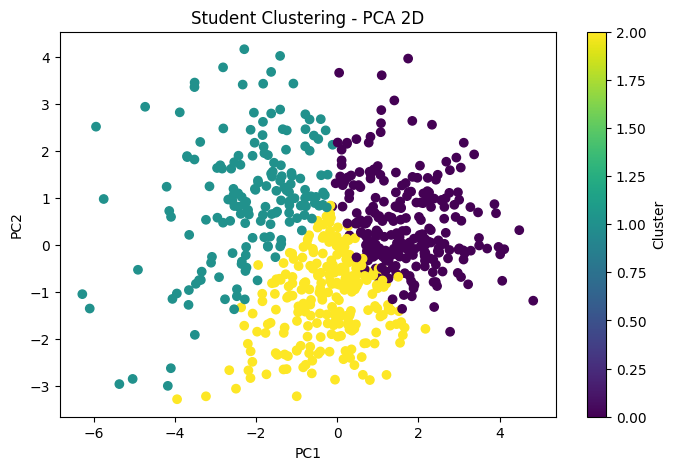

In [47]:
student_features = ['studytime', 'failures', 'schoolsup', 'famsup', 'activities',
                    'internet', 'goout', 'Dalc', 'Walc', 'freetime', 'absences', 'G1', 'G2', 'G3']

X_cluster = df_student[student_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, labels))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Student Clustering - PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()

<h3 style="color:green;">2️Fammily-Based Clustering</h3>

Question: Can we detect clusters of students who share similar family structures (e.g., parental education, job, relationship status)?

In [48]:
family_features = [
    'Medu',     # Mother's education (ordinal)
    'Fedu',     # Father's education (ordinal)
    'Mjob',     # Mother's job (categorical)
    'Fjob',     # Father's job (categorical)
    'Pstatus',  # Parents living together (binary)
    'famsize',  # Family size (binary)
    'guardian'  # Guardian type (categorical)
]
family_features = [col for col in df_family.columns if any(prefix in col for prefix in ['Medu', 'Fedu', 'Mjob_', 'Fjob_', 'Pstatus_', 'famsize_', 'guardian_'])]

Silhouette Score: 0.1824040235377508


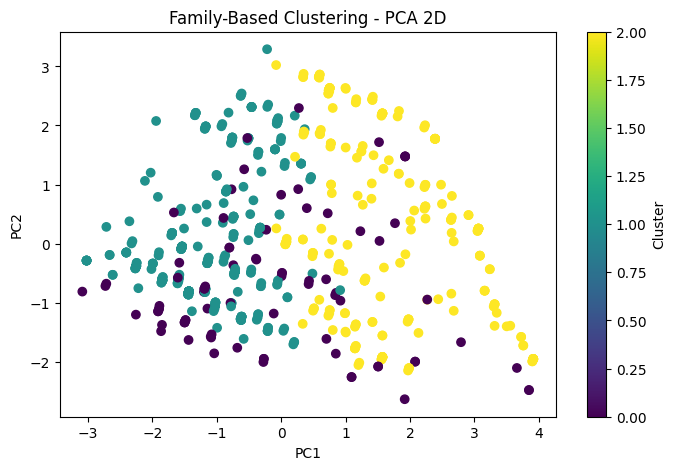

In [49]:
X_family = df_family[family_features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_family)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

print("Silhouette Score:", silhouette_score(X_scaled, labels))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Family-Based Clustering - PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()


## Analytical Objectives

<h3 style="color:blue;">1️ Feature Importance</h3>

Question: Which variables have the greatest impact on students' final grade (G3)?

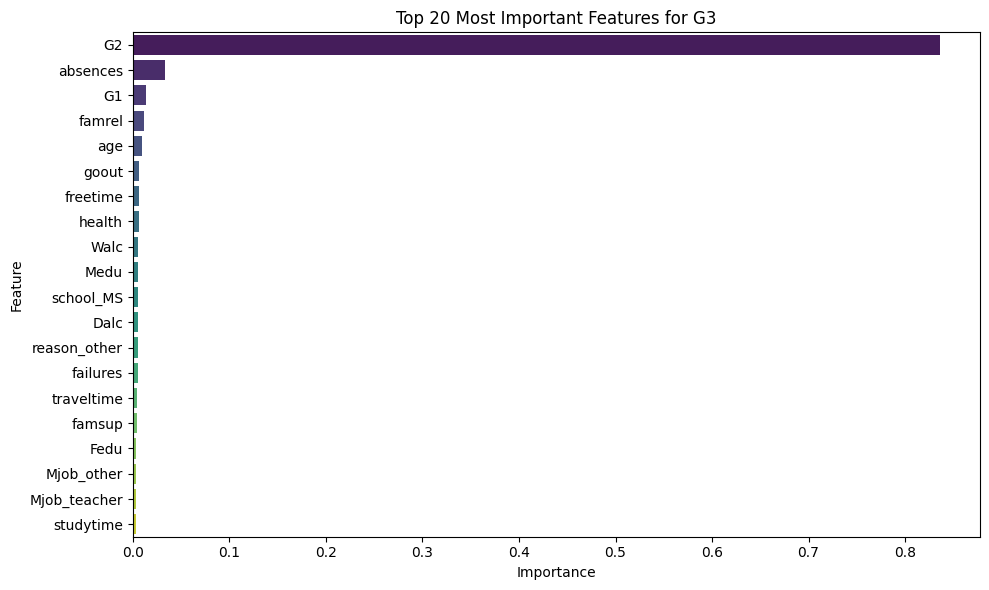

In [50]:
X = df_importance.drop('G3', axis=1)
y = df_importance['G3']

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Most Important Features for G3")
plt.tight_layout()
plt.show()

<h3 style="color:green;">2️ Support Program Impact</h3>

Question: Do educational support programs (schoolsup, famsup) affect student success?

In [51]:
print("Schoolsup etkisi:")
print(df_support_program.groupby('schoolsup')['G3'].mean())

print("\nFamsup etkisi:")
print(df_support_program.groupby('famsup')['G3'].mean())

school_sup_test = ttest_ind(df_support_program[df_support_program['schoolsup'] == 1]['G3'],
                            df_support_program[df_support_program['schoolsup'] == 0]['G3'], equal_var=False)

famsup_test = ttest_ind(df_support_program[df_support_program['famsup'] == 1]['G3'],
                        df_support_program[df_support_program['famsup'] == 0]['G3'], equal_var=False)

print("\nT-test (schoolsup):", school_sup_test)
print("T-test (famsup):", famsup_test)

Schoolsup etkisi:
schoolsup
0    11.979346
1    11.279412
Name: G3, dtype: float64

Famsup etkisi:
famsup
0    11.665339
1    12.057789
Name: G3, dtype: float64

T-test (schoolsup): TtestResult(statistic=np.float64(-2.247386399818792), pvalue=np.float64(0.026753318027728606), df=np.float64(102.7248464707662))
T-test (famsup): TtestResult(statistic=np.float64(1.4444426859970576), pvalue=np.float64(0.14929965323472838), df=np.float64(457.0544400997788))


<h3 style="color:orange;">3️⃣ Lifestyle Impacts </h3>

Question: How do social life and habits (gout, Dalc, Walc, health) affect success?

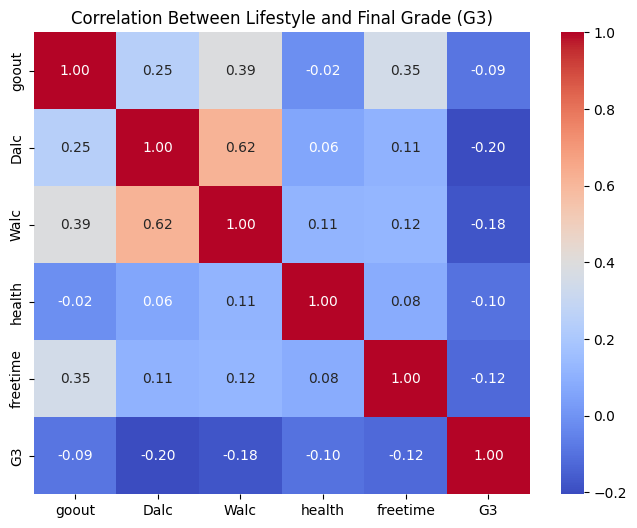

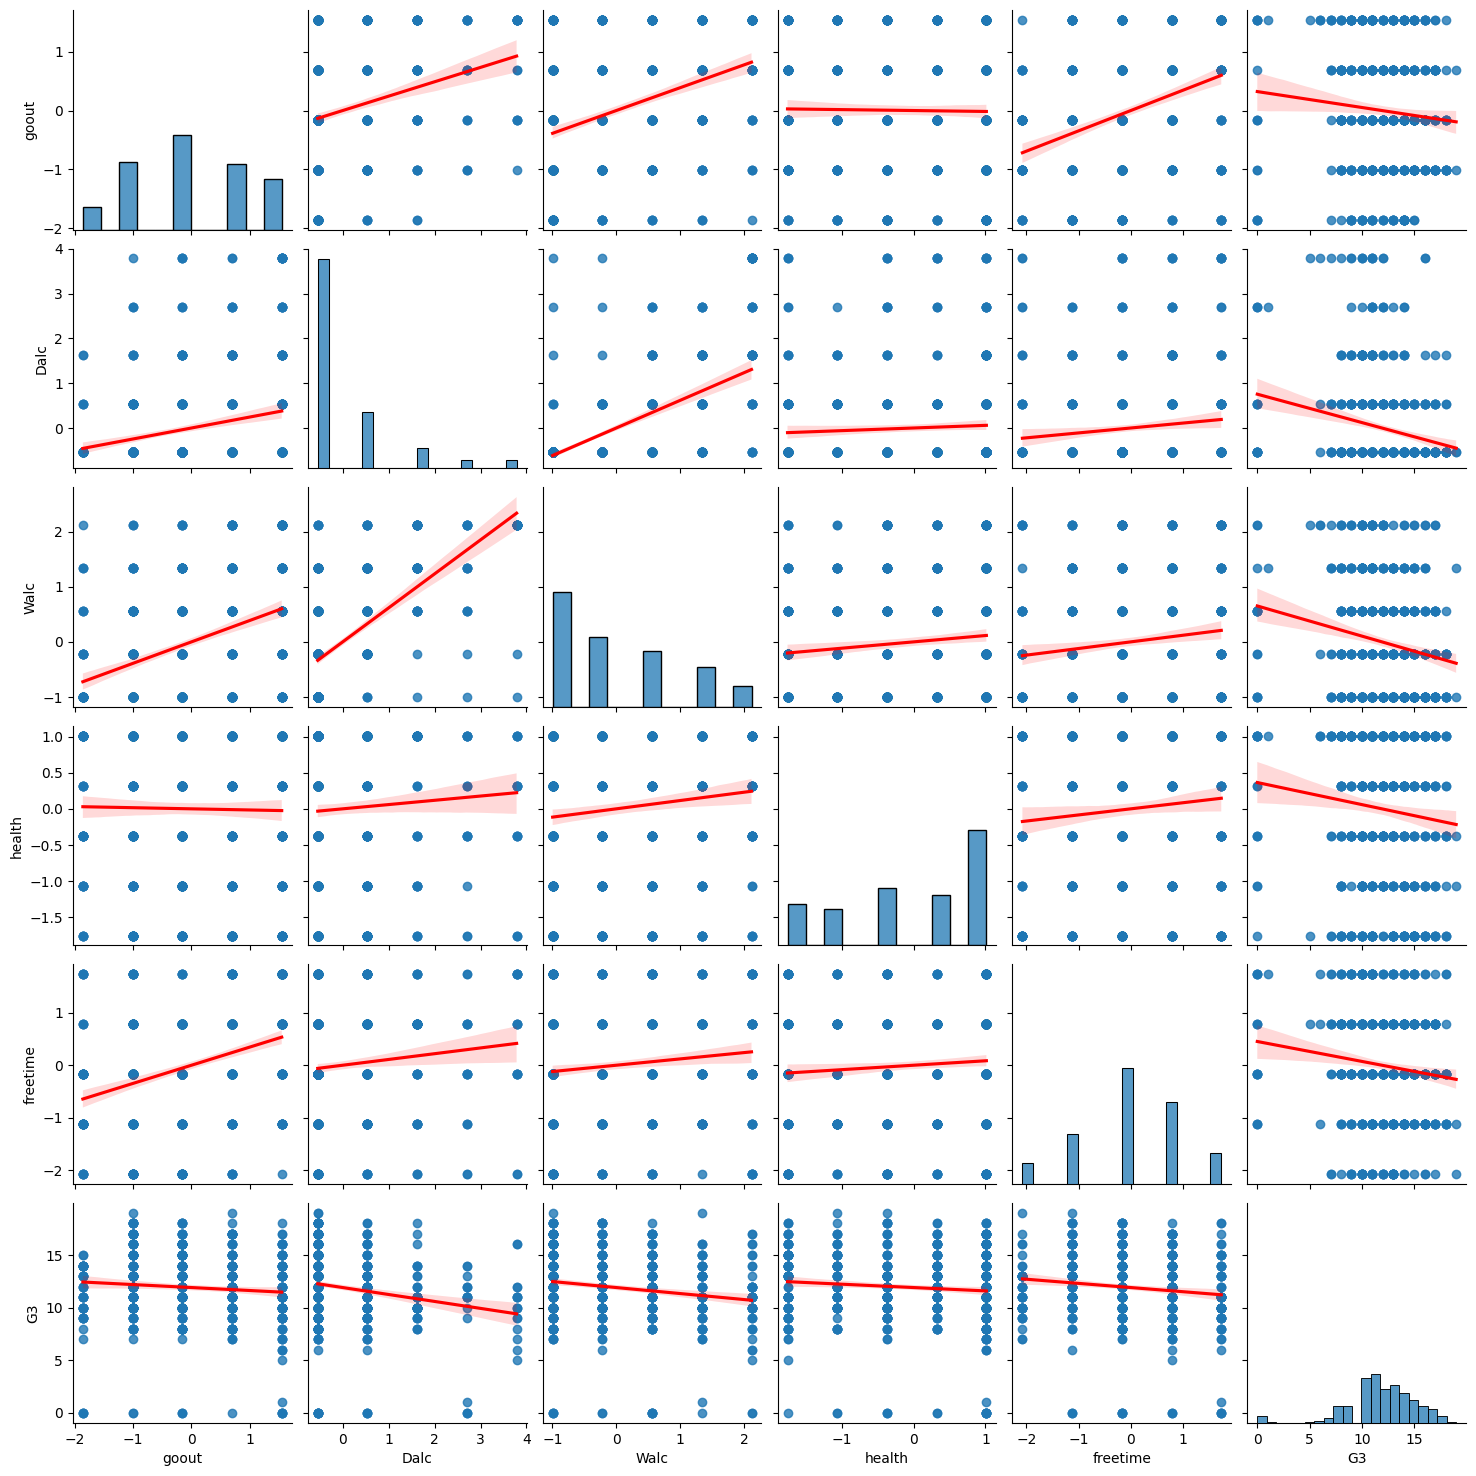

In [52]:
lifestyle_vars = ['goout', 'Dalc', 'Walc', 'health', 'freetime']
lifestyle_df = df_lifestyle[lifestyle_vars + ['G3']]

corr = lifestyle_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Lifestyle and Final Grade (G3)")
plt.show()

# Alternatif: scatter
sns.pairplot(lifestyle_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})

<div style="background-color:#f0f8ff; border-left:6px solid #007acc; padding:10px 15px; margin-top:20px;">
  <h2 style="color:#007acc;">⏳ 5. Conclusion</h2>
</div>


## Evaluation

### Supervised Learning

I achieved a score of 0.84 in the regression task, which is a quite good result. Especially considering that we didn’t have many numerical features, I think this is a solid outcome. In a similar problem I encountered before, I obtained a lower score.

In the binary classification model, the imbalance in the distribution of pass and fail labels may have affected the performance. Therefore, we might have obtained an imbalanced result.
It seems that the model predicts the positive class (1s) much better than the negative class (2s).
However, in terms of the overall score, the result can still be considered good.

In the third model, we evaluated the results using more classes. Despite having 3 classes, the lowest and highest classes achieved similar results.
The middle class performed somewhere in between but closer to class 2.
It appears that as the success class increases, the likelihood of correct predictions also increases.

In the fourth model, we predicted G3 (the final score) using G1 and G2 scores. We achieved a high score here as well, but it doesn’t seem to be entirely linear.

In the last model, although it predicted the non-failing cases quite well, it seems to have struggled to predict the failing cases accurately due to an insufficient number of examples.

### Unsupervised Learning

At this stage, I couldn't achieve good results with either model, as the scores I obtained were quite low. When I increased the number of clusters, the results got even worse.

### Analytical Objects

From the first graph, we can observe that the G2 score has a positive impact on the G3 score in terms of feature importance. This seemed quite natural to me, as using G2 to predict G3 means using the student’s most recent performance indicator.

What caught my attention was that absenteeism in the first term appears to have a stronger effect than in the second term.

When we look at the impact of support programs, it’s clear that they don’t have a significant effect. In fact, it is notable that students who receive extra educational support tend to perform worse on average.

Finally, when we examine the correlations, no extremely strong relationships are observed.

## Sources
Source Cortez, P. (2008). Student Performance [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5TG7T. 
UCI Machine Learning

LLM Using Link: https://chatgpt.com/share/684590cf-80c4-8004-91d9-f83cc08ab5eb